In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import gc
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns', 150)
pd.set_option('max_rows', 150)

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats
#To plot figs on jupyter
%matplotlib inline
# figure size in inches
rcParams['figure.figsize'] = 14,6

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)

In [3]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/features/FEATURES-2014-2015/part-117.csv
/kaggle/input/features/FEATURES-2014-2015/part-105.csv
/kaggle/input/features/FEATURES-2014-2015/part-053.csv
/kaggle/input/features/FEATURES-2014-2015/part-016.csv
/kaggle/input/features/FEATURES-2014-2015/part-047.csv
/kaggle/input/features/FEATURES-2014-2015/part-186.csv
/kaggle/input/features/FEATURES-2014-2015/part-046.csv
/kaggle/input/features/FEATURES-2014-2015/part-145.csv
/kaggle/input/features/FEATURES-2014-2015/part-023.csv
/kaggle/input/features/FEATURES-2014-2015/part-087.csv
/kaggle/input/features/FEATURES-2014-2015/part-085.csv
/kaggle/input/features/FEATURES-2014-2015/part-103.csv
/kaggle/input/features/FEATURES-2014-2015/part-160.csv
/kaggle/input/features/FEATURES-2014-2015/part-150.csv
/kaggle/input/features/FEATURES-2014-2015/part-058.csv
/kaggle/input/features/FEATURES-2014-2015/part-044.csv
/kaggle/input/features/FEATURES-2014-2015/part-115.csv
/kaggle/input/features/FEATURES-2014-2015/part-001.csv
/kaggle/in

In [4]:
PATH =   r"/kaggle/input/features/FEATURES-2014-2015/"
df = pd.read_csv(PATH+"part-067.csv")
df.shape

(40252, 235)

In [5]:
df.columns

Index(['host', 'process', 'timestamp', 'isAnomaly',
       'Prepared statement cache hit rate : ((MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheHitCount / MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheMissCount))',
       'Memory space usage : ((MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.committed / MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.max))',
       'Active connections : (MXBean(com.bea:Name=source04,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)',
       'Available db connection activity : (d/dx (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).NumAvailable))',
       'Active connections : (MXBean(com.bea:Name=source03,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)',
       'DB connection started : (incld/dx (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).ConnectionsTotalCount))',
       ...
       'Available db connection activity : (d/dx (MXBean(com.bea:

In [6]:
df.head()

host process         timestamp  isAnomaly  \
0  lphost09    wls1  2015-02-02 21:45      False   
1  lphost09    wls1  2015-02-02 21:46      False   
2  lphost09    wls1  2015-02-02 21:47      False   
3  lphost09    wls1  2015-02-02 21:48      False   
4  lphost09    wls1  2015-02-02 21:49      False   

   Prepared statement cache hit rate : ((MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheHitCount / MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheMissCount))  \
0                                                1.0                                                                                                                                                          
1                                                1.0                                                                                                                                                          
2                                                1.0                                                                                                                                                          
3                                                1.0                                                                                                                                                          
4                                                1.0                                                                                                                                                          

   Memory space usage : ((MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.committed / MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.max))  \
0                                           0.761719                                                                                                          
1                                           0.761719                                                                                                          
2                                           0.761719                                                                                                          
3                                           0.761719                                                                                                          
4                                           0.761719                                                                                                          

   Active connections : (MXBean(com.bea:Name=source04,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)  \
0                                                0.0                                                                   
1                                                0.0                                                                   
2                                                0.0                                                                   
3                                                0.0                                                                   
4                                                0.0                                                                   

   Available db connection activity : (d/dx (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).NumAvailable))  \
0                                                0.0                                                                   
1                                                0.0                                                                   
2                                                0.0                                                                   
3                                                0.0                                                                   
4                                                0.0                                                                   

   Active connections : (MXBean(com.bea:Name=source03,

In [7]:
df.dtypes

host                                                                                                                                                                                                         object
process                                                                                                                                                                                                      object
timestamp                                                                                                                                                                                                    object
isAnomaly                                                                                                                                                                                                      bool
Prepared statement cache hit rate : ((MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheHitCount / MXBean(com.bea:Name=source06,Type

In [8]:
df.isAnomaly.value_counts()

False    40231
True        21
Name: isAnomaly, dtype: int64

In [9]:
df[df['isAnomaly']==True].head()

host process         timestamp  isAnomaly  \
9795  lphost09    wls1  2015-02-09 17:00       True   
9796  lphost09    wls1  2015-02-09 17:01       True   
9797  lphost09    wls1  2015-02-09 17:02       True   
9798  lphost09    wls1  2015-02-09 17:03       True   
9799  lphost09    wls1  2015-02-09 17:04       True   

      Prepared statement cache hit rate : ((MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheHitCount / MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheMissCount))  \
9795                                                1.0                                                                                                                                                          
9796                                                1.0                                                                                                                                                          
9797                                                1.0                                                                                                                                                          
9798                                                1.0                                                                                                                                                          
9799                                                1.0                                                                                                                                                          

      Memory space usage : ((MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.committed / MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.max))  \
9795                                           0.981771                                                                                                          
9796                                           0.981771                                                                                                          
9797                                           0.981771                                                                                                          
9798                                           0.981771                                                                                                          
9799                                           0.981771                                                                                                          

      Active connections : (MXBean(com.bea:Name=source04,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)  \
9795                                                0.0                                                                   
9796                                                0.0                                                                   
9797                                                0.0                                                                   
9798                                                0.0                                                                   
9799                                                0.0                                                                   

      Available db connection activity : (d/dx (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).NumAvailable))  \
9795                                                0.0                                                                   
9796                                                0.0                                                                   
9797                                                0.0                                                                   
9798                                                0.0                                                                   
9799                                                0.0                                    

In [10]:
df[df['isAnomaly']==True].describe()

Prepared statement cache hit rate : ((MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheHitCount / MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheMissCount))  \
count                                               21.0                                                                                                                                                          
mean                                                 1.0                                                                                                                                                          
std                                                  0.0                                                                                                                                                          
min                                                  1.0                                                                                                                                                          
25%                                                  1.0                                                                                                                                                          
50%                                                  1.0                                                                                                                                                          
75%                                                  1.0                                                                                                                                                          
max                                                  1.0                                                                                                                                                          

       Memory space usage : ((MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.committed / MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.max))  \
count                                          21.000000                                                                                                          
mean                                            0.981771                                                                                                          
std                                             0.000000                                                                                                          
min                                             0.981771                                                                                                          
25%                                             0.981771                                                                                                          
50%                                             0.981771                                                                                                          
75%                                             0.981771                                                                                                          
max                                             0.981771                                                                                                          

       Active connections : (MXBean(com.bea:Name=source04,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)  \
count                                               21.0                                                                   
mean                                                 0.0                                                                   
std                                                  0.0                                                                   
min                                                  0.0                                                                   
25%                

In [11]:
from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected = True)

def line_plot_check_nan(df1, df2, x, y, title, width, height):
    
    trace1 = go.Scatter(
        x = df1[x],
        y = df1[y],
        mode='lines',
        name='with_nans',
        marker = dict(
            color = '#1E90FF', 
        ), 
    )
    
    df3 = df2.dropna()
    trace2 = go.Scatter(
        x = df3[x],
        y = df3[y],
        mode='markers',
        name='no_nans',
        marker = dict(
            color = 'red', 
        ), 
    )
    
    layout = go.Layout(
        title = go.layout.Title(
            text = title,
            x = 0.5
        ),
        font = dict(size = 14),
        width = width,
        height = height,
    )
    
    data = [trace1, trace2]
    fig = go.Figure(data = data, layout = layout)
    py.iplot(fig, filename = 'line_plot')

In [12]:
line_plot_check_nan(df[df['isAnomaly']==True], df[df['isAnomaly']==True], 'timestamp', "Heap usage activity : (d/dx (MXBean(java.lang:type=Memory).HeapMemoryUsage.used))"," Memory space usage by date", 1400, 600)

In [13]:
line_plot_check_nan(df[df['isAnomaly']==False], df[df['isAnomaly']==False], 'timestamp', "Heap usage activity : (d/dx (MXBean(java.lang:type=Memory).HeapMemoryUsage.used))"," Memory space usage by date", 1400, 600)

The correlation between Heap usage activity : (d/dx (MXBean(java.lang:type=Memory).HeapMemoryUsage.used)) and the TARGET is 0.0013
Median value for request with high runtime value = 58136488.0000
Median value for request with low runtime value =     14758192.0000


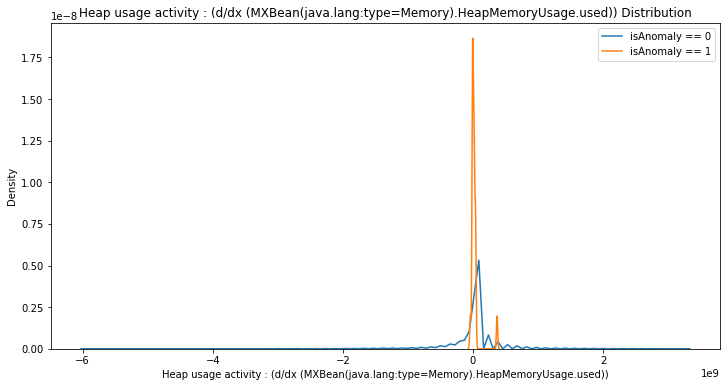

In [14]:
# Plots the disribution of a variable colored by value of the target
def kde_target(var_name, df):
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df['isAnomaly'].corr(df[var_name])
    
    # Calculate medians for repaid vs not repaid
    avg_highr = df.loc[df['isAnomaly'] == 0, var_name].median()
    avg_lowr = df.loc[df['isAnomaly'] == 1, var_name].median()
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.loc[df['isAnomaly'] == 0, var_name], label = 'isAnomaly == 0')
    sns.kdeplot(df.loc[df['isAnomaly'] == 1, var_name], label = 'isAnomaly == 1')
    
    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    plt.legend();
    
    # print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))
    # Print out average values
    print('Median value for request with high runtime value = %0.4f' % avg_highr)
    print('Median value for request with low runtime value =     %0.4f' % avg_lowr)
    

kde_target('Heap usage activity : (d/dx (MXBean(java.lang:type=Memory).HeapMemoryUsage.used))', df[['Heap usage activity : (d/dx (MXBean(java.lang:type=Memory).HeapMemoryUsage.used))','isAnomaly']].dropna(),)

## End Notebook